In [96]:
import pandas as pd
import numpy as np
import matplotlib as plt

np.random.seed(10)

In [97]:
file_path = '../../datasets/278k_labelled_uri.csv'
moodify_data = pd.read_csv(file_path).drop(["Unnamed: 0", "Unnamed: 0.1"], axis=1)
moodify_data

,duration (ms),danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,spec_rate,labels,uri
0,195000.0,0.611,0.614,-8.815,0.0672,0.01690,0.000794,0.7530,0.520,128.050,3.446154e-07,2,spotify:track:3v6sBj3swihU8pXQQHhDZo
1,194641.0,0.638,0.781,-6.848,0.0285,0.01180,0.009530,0.3490,0.250,122.985,1.464234e-07,1,spotify:track:7KCWmFdw0TzoJbKtqRRzJO
2,217573.0,0.560,0.810,-8.029,0.0872,0.00710,0.000008,0.2410,0.247,170.044,4.007850e-07,1,spotify:track:2CY92qejUrhyPUASawNVRr
3,443478.0,0.525,0.699,-4.571,0.0353,0.01780,0.000088,0.0888,0.199,92.011,7.959809e-08,0,spotify:track:11BPfwVbB7vok7KfjBeW4k
4,225862.0,0.367,0.771,-5.863,0.1060,0.36500,0.000001,0.0965,0.163,115.917,4.693131e-07,1,spotify:track:3yUJKPsjvThlcQWTS9ttYx
...,...,...,...,...,...,...,...,...,...,...,...,...,...
277933,276360.0,0.777,0.725,-9.012,0.0470,0.12600,0.010800,0.0917,0.851,128.349,1.700680e-07,1,spotify:track:6wLr2oR8eqUG5Beleh2Crm
277934,284773.0,0.543,0.482,-12.789,0.1940,0.08530,0.000092,0.1110,0.415,193.513,6.812444e-07,1,spotify:track:5mYtpXrZZ1bbGJYDGC8I0Y
277935,241307.0,0.527,0.942,-5.640,0.0366,0.01150,0.000000,0.1880,0.495,148.723,1.516740e-07,2,spotify:track:7FwBtcecmlpc1sLySPXeGE
277936,234333.0,0.768,0.829,-5.109,0.0313,0.09640,0.000029,0.0970,0.962,118.773,1.335706e-07,1,spotify:track:2olVm1lHicpveMAo4AUDRB


In [98]:
print(moodify_data.memory_usage(index=True).sum())

28905680


In [99]:
print(moodify_data.isnull().sum())

duration (ms)       0
danceability        0
energy              0
loudness            0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
spec_rate           0
labels              0
uri                 0
dtype: int64


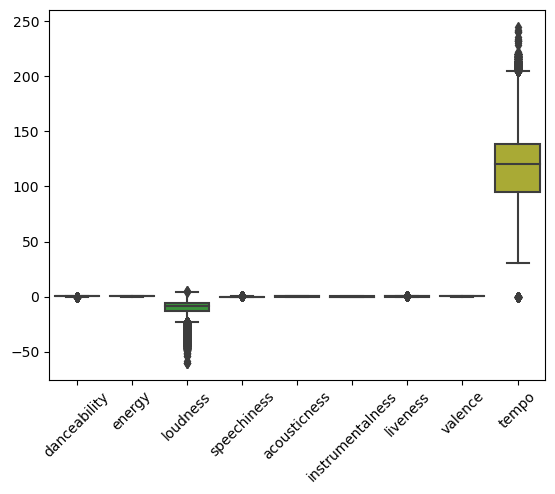

In [100]:
import seaborn as sns
import matplotlib.pyplot as plt

# List of numerical columns (assuming they've already been scaled)
numeric_columns = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
                   'instrumentalness', 'liveness', 'valence', 'tempo']

# Create the boxplot
sns.boxplot(data=moodify_data[numeric_columns])
plt.xticks(rotation=45)
# Show the plot
plt.show()

In [101]:
#fixing the outlier 
import numpy as np
import pandas as pd

# Function to impute outliers using IQR method
def impute_outliers_IQR(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    IQR = q3 - q1
    upper = q3 + 1.5 * IQR
    lower = q1 - 1.5 * IQR
    mean_val = column.mean()
    column = np.where(column > upper, mean_val, np.where(column < lower, mean_val, column))
    return column


column_name = moodify_data.columns

# Print initial shape of the data
print("Old Shape: ", moodify_data.shape)

# Calculate percentage of outliers and replace them with the mean
print("Percentage of Outliers:")
for i in range(len(column_name)-1):
    Q1 = moodify_data[column_name[i]].quantile(0.25)
    Q3 = moodify_data[column_name[i]].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    # Find the outlier rows
    upper_array = np.where(moodify_data[column_name[i]] >= upper)[0]
    lower_array = np.where(moodify_data[column_name[i]] <= lower)[0]
    
    # Print percentage of outliers
    percentage_outliers = (len(upper_array) + len(lower_array)) / len(moodify_data) * 100
    print(f"{column_name[i]}: {percentage_outliers:.2f}%")
    
    # Replace outliers with the mean
    moodify_data[column_name[i]] = impute_outliers_IQR(moodify_data[column_name[i]])

# Print the new shape of the data
print("New Shape: ", moodify_data.shape)

Old Shape:  (277938, 13)
Percentage of Outliers:
duration (ms): 5.50%
danceability: 0.03%
energy: 0.00%
loudness: 6.53%
speechiness: 13.47%
acousticness: 0.00%
instrumentalness: 0.00%
liveness: 7.34%
valence: 0.00%
tempo: 0.27%
spec_rate: 12.28%
labels: 0.00%
New Shape:  (277938, 13)


In [102]:
print(moodify_data.memory_usage(index=True).sum())

28905680


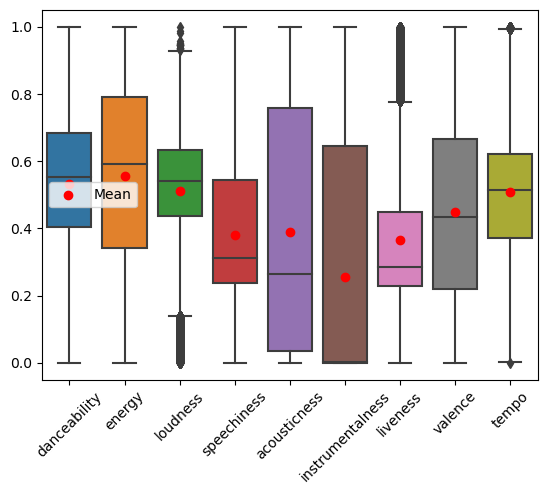

In [103]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


numeric_columns = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
                   'instrumentalness', 'liveness', 'valence', 'tempo']

scaler = MinMaxScaler(feature_range=(0,1))
moodify_data[numeric_columns] = scaler.fit_transform(moodify_data[numeric_columns])
# scaler = StandardScaler()
# moodify_data[numeric_columns] = scaler.fit_transform(moodify_data[numeric_columns])

# Create the boxplot
sns.boxplot(data=moodify_data[numeric_columns])
means = moodify_data[numeric_columns].mean()

plt.scatter(x=np.arange(len(means)), y=means, color='red', zorder=3, label='Mean')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [105]:
moodify_data.to_csv('../../datasets/moodify_preprocessed.csv', index=False) 